<a href="https://colab.research.google.com/github/almaprateek/Machine_learning/blob/main/Assignment_Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem

In [9]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/MODULE 4 - MACHINE LEARNING/4.3 - Linear Regression Implementation/50_Startups.csv')

**Assumption of regression line**
1. The relation between the dependent and independent variables
should be almost linear.
2. Mean of residuals should be zero or close to 0 as much as possible. It
is done to check whether our line is actually the line of “best ﬁt”.
3. There should be homoscedasticity or equal variance in a regression
model. This assumption means that the variance around the
regression line is the same for all values of the predictor variable (X).
4. There should not be multicollinearity in regression model.
Multicollinearity generally occurs when there are high correlations
between two or more independent variables.

In [5]:
len(dataset)

50

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
dataset.shape

(50, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


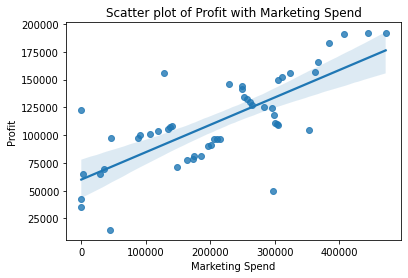

In [11]:
sns.regplot(dataset['Marketing Spend'], dataset['Profit'])
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


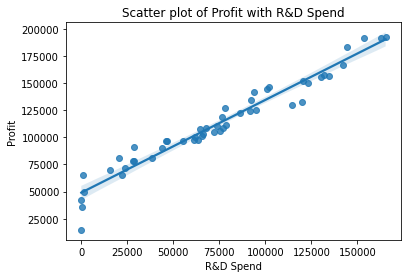

In [12]:
sns.regplot(dataset['R&D Spend'], dataset['Profit'])
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


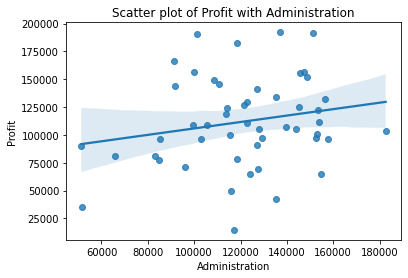

In [13]:
sns.regplot(dataset['Administration'], dataset['Profit'])
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

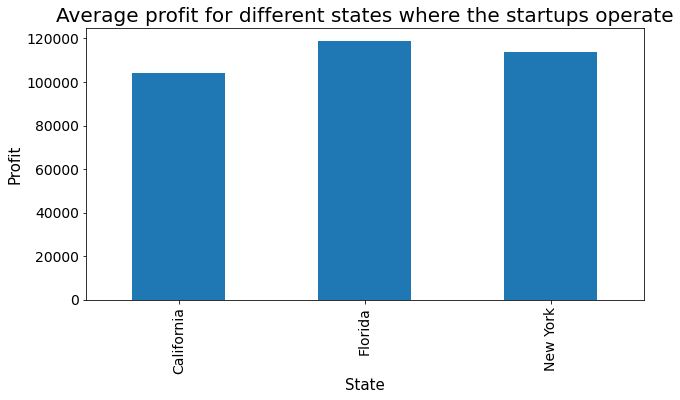

In [14]:
# Create the figure object 
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [15]:
dataset.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [18]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [19]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [20]:
dependent_variable = 'Profit'

In [21]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [22]:
independent_variables

['Administration',
 'NewYork_State',
 'California_State',
 'Marketing Spend',
 'Florida_State',
 'R&D Spend']

In [23]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [24]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train[0:10]

array([[0.48655174, 0.        , 0.        , 0.45494286, 1.        ,
        0.33561668],
       [0.3173015 , 1.        , 0.        , 0.43561799, 0.        ,
        0.2782839 ],
       [0.87258866, 0.        , 0.        , 0.28413435, 1.        ,
        0.45557444],
       [1.        , 0.        , 1.        , 0.44680961, 0.        ,
        0.2807759 ],
       [0.59103645, 0.        , 0.        , 0.62511553, 1.        ,
        0.55488118],
       [0.88568959, 0.        , 0.        , 0.68649342, 1.        ,
        0.7880179 ],
       [0.98922572, 0.        , 0.        , 0.54370828, 1.        ,
        0.72539353],
       [0.6847981 , 1.        , 0.        , 0.0040356 , 0.        ,
        0.0060492 ],
       [0.00432296, 1.        , 0.        , 0.        , 0.        ,
        0.00327821],
       [0.95618996, 1.        , 0.        , 0.22709197, 0.        ,
        0.39676926]])

In [27]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [29]:
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794959

In [30]:
r2_score(y_test, y_pred)

0.9347068473282423